In [1]:
pip install tensorflow

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.75.1-cp313-cp313-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached ml_dtypes-0.5.3-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using c

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import pandas as pd
import seaborn as sns


In [3]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 504s 3us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (50000, 1)


In [10]:
unique_classes = np.unique(y_train)
print("Class indices in dataset:", unique_classes)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Print names automatically based on dataset
print("\nClasses present in CIFAR-10 dataset:")
for idx in unique_classes:
    print(f"{idx}: {class_names[idx]}")

Class indices in dataset: [0 1 2 3 4 5 6 7 8 9]

Classes present in CIFAR-10 dataset:
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck



===== Class: AUTOMOBILE =====
Total images: 5000


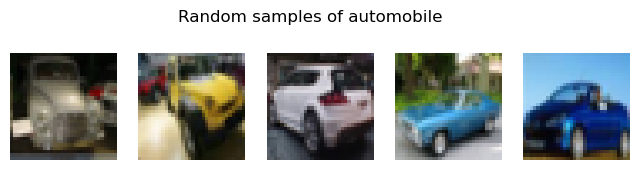

Mean R: 120.15, Mean G: 115.91, Mean B: 114.04


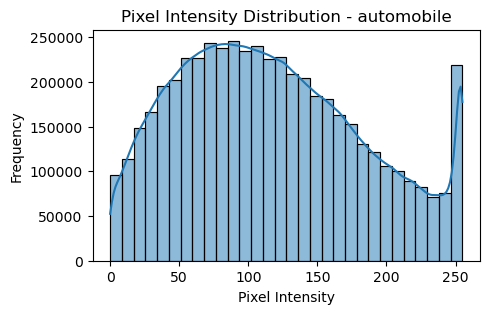

Distribution analysis: approximately normal (skewness = 0.35)


In [26]:
class_id = 1
class_name = class_names[class_id]
class_images = x_train[y_train.flatten() == class_id]

print(f"\n===== Class: {class_name.upper()} =====")
print(f"Total images: {len(class_images)}")

# Display 5 random samples
plt.figure(figsize=(8, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(class_images[np.random.randint(len(class_images))])
    plt.axis('off')
plt.suptitle(f"Random samples of {class_name}")
plt.show()

# Mean RGB values
mean_r = np.mean(class_images[:, :, :, 0])
mean_g = np.mean(class_images[:, :, :, 1])
mean_b = np.mean(class_images[:, :, :, 2])
print(f"Mean R: {mean_r:.2f}, Mean G: {mean_g:.2f}, Mean B: {mean_b:.2f}")

# Pixel intensity histogram
gray_images = np.mean(class_images, axis=3)
pixel_values = gray_images.flatten()
plt.figure(figsize=(5, 3))
sns.histplot(pixel_values, bins=30, kde=True)
plt.title(f"Pixel Intensity Distribution - {class_name}")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

# Distribution type
skewness = np.mean((pixel_values - np.mean(pixel_values))**3) / (np.std(pixel_values)**3)
if abs(skewness) < 0.5:
    dist_type = "approximately normal"
elif skewness > 0:
    dist_type = "positively skewed"
else:
    dist_type = "negatively skewed"
print(f"Distribution analysis: {dist_type} (skewness = {skewness:.2f})")



===== Class: BIRD =====
Total images: 5000


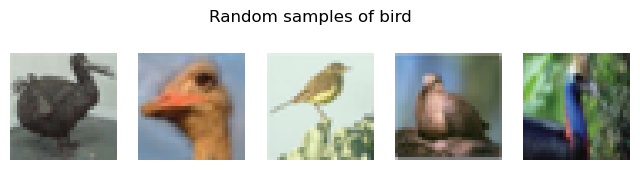

Mean R: 124.76, Mean G: 125.33, Mean B: 108.13


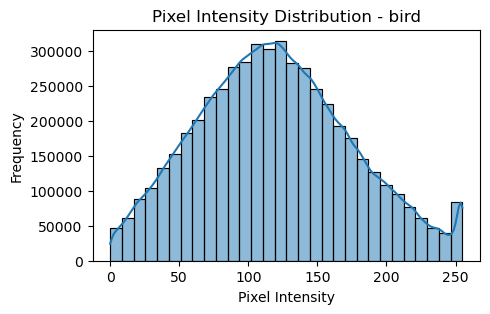

Distribution analysis: approximately normal (skewness = 0.22)


In [27]:
class_id = 2
class_name = class_names[class_id]
class_images = x_train[y_train.flatten() == class_id]

print(f"\n===== Class: {class_name.upper()} =====")
print(f"Total images: {len(class_images)}")

# Display 5 random samples
plt.figure(figsize=(8, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(class_images[np.random.randint(len(class_images))])
    plt.axis('off')
plt.suptitle(f"Random samples of {class_name}")
plt.show()

# Mean RGB values
mean_r = np.mean(class_images[:, :, :, 0])
mean_g = np.mean(class_images[:, :, :, 1])
mean_b = np.mean(class_images[:, :, :, 2])
print(f"Mean R: {mean_r:.2f}, Mean G: {mean_g:.2f}, Mean B: {mean_b:.2f}")

# Pixel intensity histogram
gray_images = np.mean(class_images, axis=3)
pixel_values = gray_images.flatten()
plt.figure(figsize=(5, 3))
sns.histplot(pixel_values, bins=30, kde=True)
plt.title(f"Pixel Intensity Distribution - {class_name}")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

# Distribution type
skewness = np.mean((pixel_values - np.mean(pixel_values))**3) / (np.std(pixel_values)**3)
if abs(skewness) < 0.5:
    dist_type = "approximately normal"
elif skewness > 0:
    dist_type = "positively skewed"
else:
    dist_type = "negatively skewed"
print(f"Distribution analysis: {dist_type} (skewness = {skewness:.2f})")



===== Class: CAT =====
Total images: 5000


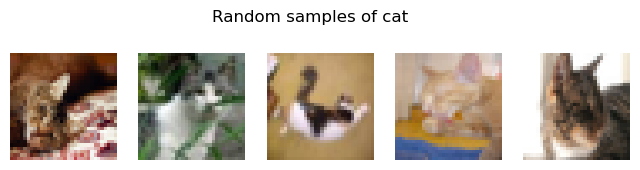

Mean R: 126.35, Mean G: 116.39, Mean B: 105.96


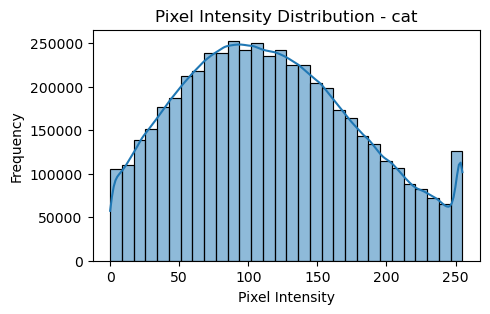

Distribution analysis: approximately normal (skewness = 0.26)


In [28]:
class_id = 3
class_name = class_names[class_id]
class_images = x_train[y_train.flatten() == class_id]

print(f"\n===== Class: {class_name.upper()} =====")
print(f"Total images: {len(class_images)}")

# Display 5 random samples
plt.figure(figsize=(8, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(class_images[np.random.randint(len(class_images))])
    plt.axis('off')
plt.suptitle(f"Random samples of {class_name}")
plt.show()

# Mean RGB values
mean_r = np.mean(class_images[:, :, :, 0])
mean_g = np.mean(class_images[:, :, :, 1])
mean_b = np.mean(class_images[:, :, :, 2])
print(f"Mean R: {mean_r:.2f}, Mean G: {mean_g:.2f}, Mean B: {mean_b:.2f}")

# Pixel intensity histogram
gray_images = np.mean(class_images, axis=3)
pixel_values = gray_images.flatten()
plt.figure(figsize=(5, 3))
sns.histplot(pixel_values, bins=30, kde=True)
plt.title(f"Pixel Intensity Distribution - {class_name}")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

# Distribution type
skewness = np.mean((pixel_values - np.mean(pixel_values))**3) / (np.std(pixel_values)**3)
if abs(skewness) < 0.5:
    dist_type = "approximately normal"
elif skewness > 0:
    dist_type = "positively skewed"
else:
    dist_type = "negatively skewed"
print(f"Distribution analysis: {dist_type} (skewness = {skewness:.2f})")
